In [1]:
# Imports :
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import math
import pandas as pd
import statsmodels

In [2]:
df = pd.read_table('horse_data23.txt')

In [3]:
df.head()

,experiment,horse,lameLeg,lameSide,lameForeHind,A,S,W,pc1,pc2,pc3,pc4
1,1,B1,none,none,none,-0.002304,-4.513454,-0.013884,0.121519,0.031750,0.046953,0.144889
2,1,B1,none,none,none,-0.045322,-4.453982,-0.012962,0.125487,-0.001296,0.043845,0.125972
3,1,B1,none,none,none,-0.010038,-6.086829,-0.008943,0.122509,-0.096972,0.007267,0.034485
4,1,B1,none,none,none,-0.001488,-4.520627,-0.009451,0.115689,0.129737,0.029682,0.128926
16,1,B2,none,none,none,-0.126048,-5.303123,0.002075,0.114835,-0.032392,0.018564,-0.118194


In [4]:
df.columns

Index(['experiment', 'horse', 'lameLeg', 'lameSide', 'lameForeHind', 'A', 'S',
       'W', 'pc1', 'pc2', 'pc3', 'pc4'],
      dtype='object')

In [5]:
class_names = np.unique(df['lameLeg'])

y = df['lameLeg']

c  =  np.array(pd.get_dummies(y)) @ np.array([1,2,3,4,5])

In [6]:
c

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 4, 4, 2, 2, 1,
       1, 3, 5, 5, 4, 4, 2, 2, 1, 1, 3, 4, 4, 2, 2, 1, 1, 3, 5, 5, 4, 4,
       2, 2, 1, 1, 3, 5, 5, 4, 4, 2, 2, 1, 1, 3, 5, 5, 4, 4, 2, 2, 1, 1,
       3, 5, 5, 4, 4, 2, 2, 1, 1, 3, 5, 5, 4, 4, 2, 2, 1, 1, 3])

In [7]:
for i in range(5):
    print("number of elements in class", class_names[i], ":")
    print(sum(c == i+1))

number of elements in class left:fore :
16
number of elements in class left:hind :
16
number of elements in class none :
23
number of elements in class right:fore :
16
number of elements in class right:hind :
14


# 1.

In [8]:
X1 = df[['A', 'W']]

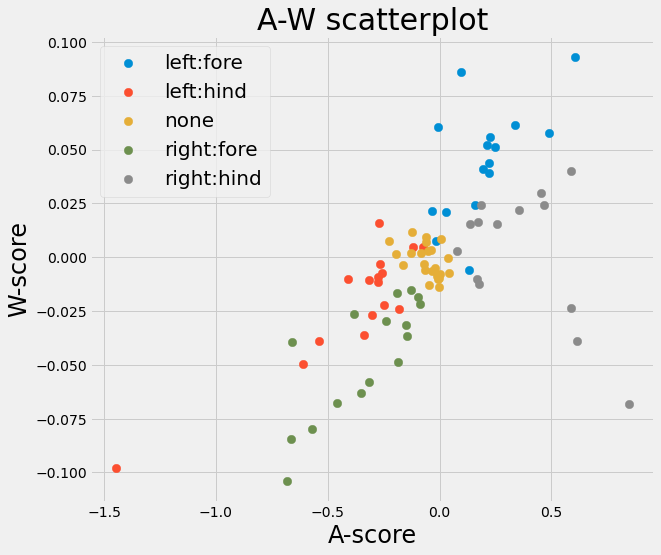

In [9]:
plt.figure(figsize=(9,8))
for i in range(5):
    index = i+1 == c
    plt.scatter(X1['A'][index], X1['W'][index], s = 70, label = class_names[i])

plt.legend(prop = {"size":20})
plt.title('A-W scatterplot', fontsize = 30)
plt.ylabel('W-score', fontsize = 24)
plt.xlabel('A-score', fontsize = 24)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import torch


Forskel i sandsynlighed for at classfierne klassificerer korrekt beskrives af nedenstående konfidens interval


In [11]:
# Forest vs Logistic
from scipy.stats import beta
from scipy.stats import binom
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
n_11=[]
n_10=[]
n_01=[]
n_00=[]
forest_1=0
log_1=0
i=0
forest_acc=[]
for name in horses:
    train_split=(df['horse']!=name)
    test_split=(df['horse']==name)
    X_train_pre=X1[train_split]
    X_test_pre=X1[test_split]
    y_train=y[train_split]
    y_test=y[test_split]

    # standardize data
    X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
    X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()


    RandomForestModel = RandomForestClassifier(n_estimators=1000)
    RandomForestModel.fit(X_train, y_train)
    print("RandomForestModel's accuracy:", sum(RandomForestModel.predict(X_test) == y_test)/len(y_test))
    forest_1=RandomForestModel.predict(X_test) == y_test

    LogisticModel = LogisticRegression()
    LogisticModel.fit(X_train, y_train)
    print("LogisticModel's accuracy:", sum(LogisticModel.predict(X_test) == y_test)/len(y_test))
    log_1=LogisticModel.predict(X_test) == y_test
    #Both are corect
    n_11.append(sum(log_1*forest_1))
    # forest is correct log is wrong
    n_10.append(sum(forest_1*(1-log_1)))
    # forest is wrong log is correct
    n_01.append(sum((1-forest_1)*log_1))
    #Both wrong
    n_00.append(sum((1-forest_1)*(1-log_1)))
    # difference in accuracy
    n=len(y_test)
    Etheta=(n_10[i]-n_01[i])/n
    if (n*(n_10[i]+n_01[i])-(n_10[i]-n_01[i])**2)!=0:
        Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(n_10[i]+n_01[i])-(n_10[i]-n_01[i])**2)
        f=(Etheta+1)/2*(Q-1)
        g=(1-Etheta)/2*(Q-1)
        # 95 % confidence interval
        p_u=2*beta.ppf(0.975,f,g)-1
        p_l=2*beta.ppf(0.025,f,g)-1
    
        print("CI: ",p_l,":",p_u) 
    else:
        print("ZeroDivisionError")


    # P- value
    pval=2*binom.cdf(min(n_10[i],n_01[i]),(n_10[i]+n_01[i]),0.5)
    print("p-value: ", pval)
    i+=1

    






RandomForestModel's accuracy: 0.6923076923076923
LogisticModel's accuracy: 0.7692307692307693
CI:  -0.2156044176759605 : 0.06325318856249318
p-value:  1.0
RandomForestModel's accuracy: 0.46153846153846156
LogisticModel's accuracy: 0.46153846153846156
CI:  -0.28912191754478744 : 0.28912191754478744
p-value:  1.375
RandomForestModel's accuracy: 1.0
LogisticModel's accuracy: 0.9
CI:  -0.07854283465624257 : 0.27538437857804654
p-value:  1.0
RandomForestModel's accuracy: 0.7692307692307693
LogisticModel's accuracy: 0.7692307692307693
ZeroDivisionError
p-value:  2.0
RandomForestModel's accuracy: 0.6666666666666666
LogisticModel's accuracy: 0.6666666666666666
CI:  -0.29070645389797267 : 0.29070645389797267
p-value:  1.5
RandomForestModel's accuracy: 0.6666666666666666
LogisticModel's accuracy: 1.0
CI:  -0.6073418141019007 : -0.026945891187956428
p-value:  0.25
RandomForestModel's accuracy: 0.7777777777777778
LogisticModel's accuracy: 0.7777777777777778
ZeroDivisionError
p-value:  2.0
RandomFo

In [12]:
# Forest vs Baseline

from scipy.stats import beta
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
n_11=[]
n_10=[]
n_01=[]
n_00=[]
forest_1=0
forest_0=0
base_1=0
i=0

forest_acc=[]
for name in horses:
    train_split=(df['horse']!=name)
    test_split=(df['horse']==name)
    X_train_pre=X1[train_split]
    X_test_pre=X1[test_split]
    y_train=y[train_split]
    y_test=y[test_split]

    # standardize data
    X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
    X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()

    RandomForestModel = RandomForestClassifier(n_estimators=1000)
    RandomForestModel.fit(X_train, y_train)
    print("RandomForestModel's accuracy:", sum(RandomForestModel.predict(X_test) == y_test)/len(y_test))
    forest_1=RandomForestModel.predict(X_test) == y_test

    # baseline
    _, counts = np.unique(y_train, return_counts=True)
    Baseline_y_pred = np.unique(df['lameLeg'])[np.argmax(counts)]
    Baseline_accuracy =  sum(y_test == Baseline_y_pred)/len(y_test)
    print("Baseline's accuracy:", Baseline_accuracy)
    base_1=y_test == Baseline_y_pred


    #Both are corect
    n_11.append(sum(base_1*forest_1))
    # forest is correct log is wrong
    n_10.append(sum(forest_1*(1-base_1)))
    # forest is wrong log is correct
    n_01.append(sum((1-forest_1)*base_1))
    #Both wrong
    n_00.append(sum((1-forest_1)*(1-base_1)))
    # difference in accuracy
    n=len(y_test)
    Etheta=(n_10[i]-n_01[i])/n

    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(n_10[i]+n_01[i])-(n_10[i]-n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("CI: ",p_l,":",p_u)
    # P- value
    pval=2*binom.cdf(min(n_10[i],n_01[i]),(n_10[i]+n_01[i]),0.5)
    print("p-value: ", pval)
    i+=1


RandomForestModel's accuracy: 0.6923076923076923
Baseline's accuracy: 0.38461538461538464
CI:  -0.024511388944792212 : 0.6051489191896953
p-value:  0.21875
RandomForestModel's accuracy: 0.46153846153846156
Baseline's accuracy: 0.38461538461538464
CI:  -0.3593119274779145 : 0.4980305360154791
p-value:  1.0
RandomForestModel's accuracy: 0.9
Baseline's accuracy: 0.4
CI:  0.05696980753899483 : 0.8344432563860278
p-value:  0.125
RandomForestModel's accuracy: 0.7692307692307693
Baseline's accuracy: 0.38461538461538464
CI:  0.11646348759732428 : 0.6232775738547802
p-value:  0.0625
RandomForestModel's accuracy: 0.6666666666666666
Baseline's accuracy: 0.1111111111111111
CI:  0.21298894412135638 : 0.8205197782308495
p-value:  0.0625
RandomForestModel's accuracy: 0.6666666666666666
Baseline's accuracy: 0.1111111111111111
CI:  0.21298894412135638 : 0.8205197782308495
p-value:  0.0625
RandomForestModel's accuracy: 0.7777777777777778
Baseline's accuracy: 0.1111111111111111
CI:  0.3282217249257582 : 

/Users/nikolaj/opt/anaconda3/envs/AndSem/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


RandomForestModel's accuracy: 0.7777777777777778
Baseline's accuracy: 0.1111111111111111
CI:  0.3282217249257582 : 0.9009847093884131
p-value:  0.03125


/Users/nikolaj/opt/anaconda3/envs/AndSem/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


In [13]:
# Logistic vs baseline
from scipy.stats import beta
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
n_11=[]
n_10=[]
n_01=[]
n_00=[]
log_1=0
base_1=0
i=0

forest_acc=[]
for name in horses:
    train_split=(df['horse']!=name)
    test_split=(df['horse']==name)
    X_train_pre=X1[train_split]
    X_test_pre=X1[test_split]
    y_train=y[train_split]
    y_test=y[test_split]

    # standardize data
    X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
    X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()

    LogisticModel = LogisticRegression()
    LogisticModel.fit(X_train, y_train)
    print("LogisticModel's accuracy:", sum(LogisticModel.predict(X_test) == y_test)/len(y_test))
    log_1=LogisticModel.predict(X_test) == y_test

    # baseline
    _, counts = np.unique(y_train, return_counts=True)
    Baseline_y_pred = np.unique(df['lameLeg'])[np.argmax(counts)]
    Baseline_accuracy =  sum(y_test == Baseline_y_pred)/len(y_test)
    print("Baseline's accuracy:", Baseline_accuracy)
    base_1=y_test == Baseline_y_pred


    #Both are corect
    n_11.append(sum(base_1*log_1))
    # forest is correct log is wrong
    n_10.append(sum(log_1*(1-base_1)))
    # forest is wrong log is correct
    n_01.append(sum((1-log_1)*base_1))
    #Both wrong
    n_00.append(sum((1-log_1)*(1-base_1)))
    # difference in accuracy
    n=len(y_test)
    Etheta=(n_10[i]-n_01[i])/n

    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(n_10[i]+n_01[i])-(n_10[i]-n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("CI: ",p_l,":",p_u) 
    # P- value
    pval=2*binom.cdf(min(n_10[i],n_01[i]),(n_10[i]+n_01[i]),0.5)
    print("p-value: ", pval)
    i+=1

LogisticModel's accuracy: 0.7692307692307693
Baseline's accuracy: 0.38461538461538464
CI:  0.11646348759732428 : 0.6232775738547802
p-value:  0.0625
LogisticModel's accuracy: 0.46153846153846156
Baseline's accuracy: 0.38461538461538464
CI:  -0.24747657086669428 : 0.39316335183292006
p-value:  1.0
LogisticModel's accuracy: 0.9
Baseline's accuracy: 0.4
CI:  0.1780722677226534 : 0.7628720083408977
p-value:  0.0625
LogisticModel's accuracy: 0.7692307692307693
Baseline's accuracy: 0.38461538461538464
CI:  0.11646348759732428 : 0.6232775738547802
p-value:  0.0625
LogisticModel's accuracy: 0.6666666666666666
Baseline's accuracy: 0.1111111111111111
CI:  0.21298894412135638 : 0.8205197782308495
p-value:  0.0625
LogisticModel's accuracy: 1.0
Baseline's accuracy: 0.1111111111111111
CI:  0.6281270089213642 : 0.9957922946788917
p-value:  0.0078125
LogisticModel's accuracy: 0.7777777777777778
Baseline's accuracy: 0.1111111111111111
CI:  0.3282217249257582 : 0.9009847093884131
p-value:  0.03125
Logis

/Users/nikolaj/opt/anaconda3/envs/AndSem/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/nikolaj/opt/anaconda3/envs/AndSem/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


In [14]:
# Ny McNemar med train/test split
# Forest vs Logistic
from scipy.stats import beta
from scipy.stats import binom
X1 = df[['A', 'W']]
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
d1_n_11=[]
d1_n_10=[]
d1_n_01=[]
d1_n_00=[]

d2_n_11=[]
d2_n_10=[]
d2_n_01=[]
d2_n_00=[]

d3_n_11=[]
d3_n_10=[]
d3_n_01=[]
d3_n_00=[]

forest_1=0
log_1=0
base_1=0
i=0

names=random.choices(horses,k=2)
horse1=names[0]
horse2=names[1]
# Train test split: Leave two horses for test
train_split=((df['horse'].to_numpy()!=horse1) & (df['horse'].to_numpy()!=horse2))
test_split=((df['horse'].to_numpy()==horse1) | (df['horse'].to_numpy()==horse2))
X_train_pre=X1[train_split]
X_test_pre=X1[test_split]
y_train=y[train_split]
y_test=y[test_split]

# standardize data
X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()

# random forest
RandomForestModel = RandomForestClassifier(n_estimators=1000)
RandomForestModel.fit(X_train, y_train)
print("RandomForestModel's accuracy:", sum(RandomForestModel.predict(X_test) == y_test)/len(y_test))
forest_1=RandomForestModel.predict(X_test) == y_test
# Logistic
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, y_train)
print("LogisticModel's accuracy:", sum(LogisticModel.predict(X_test) == y_test)/len(y_test))
log_1=LogisticModel.predict(X_test) == y_test


# baseline
_, counts = np.unique(y_train, return_counts=True)
Baseline_y_pred = np.unique(df['lameLeg'])[np.argmax(counts)]
Baseline_accuracy =  sum(y_test == Baseline_y_pred)/len(y_test)
print("Baseline's accuracy:", Baseline_accuracy)
base_1=y_test == Baseline_y_pred

# Foresst vs logistic
#Both are corect
d1_n_11.append(sum(log_1*forest_1))
# forest is correct log is wrong
d1_n_10.append(sum(forest_1*(1-log_1)))
# forest is wrong log is correct
d1_n_01.append(sum((1-forest_1)*log_1))
#Both wrong
d1_n_00.append(sum((1-forest_1)*(1-log_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d1_n_10[i]-d1_n_01[i])/n
if (n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Random forest vs Logistic classifer ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d1_n_10[i],d1_n_01[i]),(d1_n_10[i]+d1_n_01[i]),0.5)
print("p-value: ", pval)

# Foresst vs base
#Both are corect
d2_n_11.append(sum(base_1*forest_1))
# forest is correct log is wrong
d2_n_10.append(sum(forest_1*(1-base_1)))
# forest is wrong log is correct
d2_n_01.append(sum((1-forest_1)*base_1))
#Both wrong
d2_n_00.append(sum((1-forest_1)*(1-base_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d2_n_10[i]-d2_n_01[i])/n
if (n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Random forest vs Baseline ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d2_n_10[i],d2_n_01[i]),(d2_n_10[i]+d2_n_01[i]),0.5)
print("p-value: ", pval)



# Foresst vs base
#Both are corect
d3_n_11.append(sum(base_1*log_1))
# forest is correct log is wrong
d3_n_10.append(sum(log_1*(1-base_1)))
# forest is wrong log is correct
d3_n_01.append(sum((1-log_1)*base_1))
#Both wrong
d3_n_00.append(sum((1-log_1)*(1-base_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d3_n_10[i]-d3_n_01[i])/n
if (n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Logistic classifier vs Baseline ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d3_n_10[i],d3_n_01[i]),(d3_n_10[i]+d3_n_01[i]),0.5)
print("p-value: ", pval)
i+=1




NameError: name 'random' is not defined

In [ ]:
# Ny McNemar med train/test split PC3/PC4

X1 = df[['pc3', 'pc4']]

# Forest vs Logistic
from scipy.stats import beta
from scipy.stats import binom
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
d1_n_11=[]
d1_n_10=[]
d1_n_01=[]
d1_n_00=[]

d2_n_11=[]
d2_n_10=[]
d2_n_01=[]
d2_n_00=[]

d3_n_11=[]
d3_n_10=[]
d3_n_01=[]
d3_n_00=[]

forest_1=0
log_1=0
base_1=0
i=0

names=random.choices(horses,k=2)
horse1=names[0]
horse2=names[1]
# Train test split: Leave two horses for test
train_split=((df['horse'].to_numpy()!=horse1) & (df['horse'].to_numpy()!=horse2))
test_split=((df['horse'].to_numpy()==horse1) | (df['horse'].to_numpy()==horse2))
X_train_pre=X1[train_split]
X_test_pre=X1[test_split]
y_train=y[train_split]
y_test=y[test_split]

# standardize data
X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()

# random forest
RandomForestModel = RandomForestClassifier(n_estimators=1000)
RandomForestModel.fit(X_train, y_train)
print("RandomForestModel's accuracy:", sum(RandomForestModel.predict(X_test) == y_test)/len(y_test))
forest_1=RandomForestModel.predict(X_test) == y_test
# Logistic
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, y_train)
print("LogisticModel's accuracy:", sum(LogisticModel.predict(X_test) == y_test)/len(y_test))
log_1=LogisticModel.predict(X_test) == y_test


# baseline
_, counts = np.unique(y_train, return_counts=True)
Baseline_y_pred = np.unique(df['lameLeg'])[np.argmax(counts)]
Baseline_accuracy =  sum(y_test == Baseline_y_pred)/len(y_test)
print("Baseline's accuracy:", Baseline_accuracy)
base_1=y_test == Baseline_y_pred

# Foresst vs logistic
#Both are corect
d1_n_11.append(sum(log_1*forest_1))
# forest is correct log is wrong
d1_n_10.append(sum(forest_1*(1-log_1)))
# forest is wrong log is correct
d1_n_01.append(sum((1-forest_1)*log_1))
#Both wrong
d1_n_00.append(sum((1-forest_1)*(1-log_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d1_n_10[i]-d1_n_01[i])/n
if (n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Random forest vs Logistic classifer ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d1_n_10[i],d1_n_01[i]),(d1_n_10[i]+d1_n_01[i]),0.5)
print("p-value: ", pval)

# Foresst vs base
#Both are corect
d2_n_11.append(sum(base_1*forest_1))
# forest is correct log is wrong
d2_n_10.append(sum(forest_1*(1-base_1)))
# forest is wrong log is correct
d2_n_01.append(sum((1-forest_1)*base_1))
#Both wrong
d2_n_00.append(sum((1-forest_1)*(1-base_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d2_n_10[i]-d2_n_01[i])/n
if (n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Random forest vs Baseline ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d2_n_10[i],d2_n_01[i]),(d2_n_10[i]+d2_n_01[i]),0.5)
print("p-value: ", pval)



# Foresst vs base
#Both are corect
d3_n_11.append(sum(base_1*log_1))
# forest is correct log is wrong
d3_n_10.append(sum(log_1*(1-base_1)))
# forest is wrong log is correct
d3_n_01.append(sum((1-log_1)*base_1))
#Both wrong
d3_n_00.append(sum((1-log_1)*(1-base_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d3_n_10[i]-d3_n_01[i])/n
if (n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Logistic classifier vs Baseline ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d3_n_10[i],d3_n_01[i]),(d3_n_10[i]+d3_n_01[i]),0.5)
print("p-value: ", pval)
i+=1


RandomForestModel's accuracy: 0.4444444444444444
LogisticModel's accuracy: 0.3333333333333333
Baseline's accuracy: 0.1111111111111111
A/W: Random forest vs Logistic classifer 
CI:  -0.14631730487043482 : 0.3612085419726163
p-value:  0.6875
A/W: Random forest vs Baseline 
CI:  0.11368059634639494 : 0.5361456389136228
p-value:  0.03125
A/W: Logistic classifier vs Baseline 
CI:  0.03163823219025952 : 0.40466902687547224
p-value:  0.125


In [ ]:
# Ny McNemar med train/test split PC3/PC4 + A/W

X1 = df[['A','W','pc3', 'pc4']]

# Forest vs Logistic
from scipy.stats import beta
from scipy.stats import binom
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
d1_n_11=[]
d1_n_10=[]
d1_n_01=[]
d1_n_00=[]

d2_n_11=[]
d2_n_10=[]
d2_n_01=[]
d2_n_00=[]

d3_n_11=[]
d3_n_10=[]
d3_n_01=[]
d3_n_00=[]

forest_1=0
log_1=0
base_1=0
i=0

names=random.choices(horses,k=2)
horse1=names[0]
horse2=names[1]
# Train test split: Leave two horses for test
train_split=((df['horse'].to_numpy()!=horse1) & (df['horse'].to_numpy()!=horse2))
test_split=((df['horse'].to_numpy()==horse1) | (df['horse'].to_numpy()==horse2))
X_train_pre=X1[train_split]
X_test_pre=X1[test_split]
y_train=y[train_split]
y_test=y[test_split]

# standardize data
X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()

# random forest
RandomForestModel = RandomForestClassifier(n_estimators=1000)
RandomForestModel.fit(X_train, y_train)
print("RandomForestModel's accuracy:", sum(RandomForestModel.predict(X_test) == y_test)/len(y_test))
forest_1=RandomForestModel.predict(X_test) == y_test
# Logistic
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, y_train)
print("LogisticModel's accuracy:", sum(LogisticModel.predict(X_test) == y_test)/len(y_test))
log_1=LogisticModel.predict(X_test) == y_test


# baseline
_, counts = np.unique(y_train, return_counts=True)
Baseline_y_pred = np.unique(df['lameLeg'])[np.argmax(counts)]
Baseline_accuracy =  sum(y_test == Baseline_y_pred)/len(y_test)
print("Baseline's accuracy:", Baseline_accuracy)
base_1=y_test == Baseline_y_pred

# Foresst vs logistic
#Both are corect
d1_n_11.append(sum(log_1*forest_1))
# forest is correct log is wrong
d1_n_10.append(sum(forest_1*(1-log_1)))
# forest is wrong log is correct
d1_n_01.append(sum((1-forest_1)*log_1))
#Both wrong
d1_n_00.append(sum((1-forest_1)*(1-log_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d1_n_10[i]-d1_n_01[i])/n
if (n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Random forest vs Logistic classifer ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d1_n_10[i],d1_n_01[i]),(d1_n_10[i]+d1_n_01[i]),0.5)
print("p-value: ", pval)

# Foresst vs base
#Both are corect
d2_n_11.append(sum(base_1*forest_1))
# forest is correct log is wrong
d2_n_10.append(sum(forest_1*(1-base_1)))
# forest is wrong log is correct
d2_n_01.append(sum((1-forest_1)*base_1))
#Both wrong
d2_n_00.append(sum((1-forest_1)*(1-base_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d2_n_10[i]-d2_n_01[i])/n
if (n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Random forest vs Baseline ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d2_n_10[i],d2_n_01[i]),(d2_n_10[i]+d2_n_01[i]),0.5)
print("p-value: ", pval)



# Foresst vs base
#Both are corect
d3_n_11.append(sum(base_1*log_1))
# forest is correct log is wrong
d3_n_10.append(sum(log_1*(1-base_1)))
# forest is wrong log is correct
d3_n_01.append(sum((1-log_1)*base_1))
#Both wrong
d3_n_00.append(sum((1-log_1)*(1-base_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d3_n_10[i]-d3_n_01[i])/n
if (n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Logistic classifier vs Baseline ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d3_n_10[i],d3_n_01[i]),(d3_n_10[i]+d3_n_01[i]),0.5)
print("p-value: ", pval)
i+=1

RandomForestModel's accuracy: 0.5454545454545454
LogisticModel's accuracy: 0.5909090909090909
Baseline's accuracy: 0.2727272727272727
A/W: Random forest vs Logistic classifer 
CI:  -0.23812947896049508 : 0.14892766853988793
p-value:  1.0
A/W: Random forest vs Baseline 
CI:  -0.04558041902529897 : 0.5630125113118256
p-value:  0.1795654296875
A/W: Logistic classifier vs Baseline 
CI:  0.019375402977522604 : 0.5877383412320989
p-value:  0.09228515625


In [ ]:
df['horse'].to_numpy()

array(['B1', 'B1', 'B1', 'B1', 'B2', 'B2', 'B2', 'B2', 'B3', 'B3', 'B3',
       'B4', 'B4', 'B4', 'B4', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1',
       'B1', 'B1', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2',
       'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'B4', 'B4', 'B4', 'B4',
       'B4', 'B4', 'B4', 'B4', 'B4', 'B5', 'B5', 'B5', 'B5', 'B5', 'B5',
       'B5', 'B5', 'B5', 'B6', 'B6', 'B6', 'B6', 'B6', 'B6', 'B6', 'B6',
       'B6', 'B7', 'B7', 'B7', 'B7', 'B7', 'B7', 'B7', 'B7', 'B7', 'B9',
       'B9', 'B9', 'B9', 'B9', 'B9', 'B9', 'B9', 'B9'], dtype=object)

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
# Contingency table
contigency=[[d2_n_11[0],d2_n_10[0]],[d2_n_01[0],d2_n_00[0]]]


#Q=
print(contigency)
for i in range(1):  

    print(mcnemar([[n_11[i],n_10[i]],[n_01[i],n_00[i]]]))


[[8, 11], [1, 3]]
pvalue      1.0
statistic   0.0


IndexError: list index out of range

In [ ]:
print(n_10)
print(n_01)

[3, 3, 5, 3, 2, 4, 5, 6]
[2, 4, 1, 0, 0, 2, 0, 0]


In [ ]:
2*binom.cdf(min(6,0),(6+0),0.5)

0.03125

# 2.

In [ ]:
X2 = df[['pc3', 'pc4']]

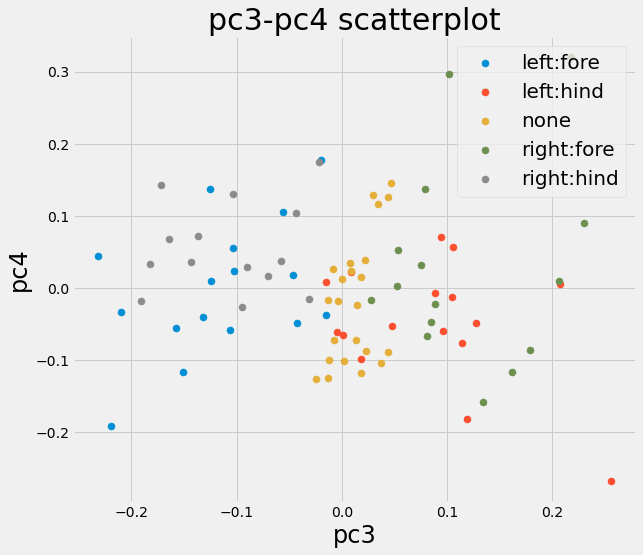

In [ ]:
plt.figure(figsize=(9,8))
for i in range(5):
    index = i+1 == c
    plt.scatter(X2['pc3'][index], X2['pc4'][index], s = 50, label = class_names[i])
plt.legend(prop = {"size":20})
plt.title('pc3-pc4 scatterplot', fontsize = 30)
plt.ylabel('pc4', fontsize = 24)
plt.xlabel('pc3', fontsize = 24)
plt.show()

# McNemar

In [18]:

c_colap  =  np.array(pd.get_dummies(y)) @ np.array([1,2,3,2,1])
for i in range(3):
    print("number of elements in class", class_names[i], ":")
    print(sum(c_colap == i+1))

number of elements in class left:fore :
30
number of elements in class left:hind :
32
number of elements in class none :
23


In [41]:
def decision_boundary(X1, model, c, labels, xlab, ylab):
    X_test = X1.to_numpy()
    X_test = (X_test - np.mean(X_test))/(np.std(X_test))
    X_test[1:5,:]

    x0, x1 = np.meshgrid(
        np.linspace(X_test[:,0].min(), X_test[:,0].max(), 500).reshape(-1, 1),
        np.linspace(X_test[:,1].min(), X_test[:,1].max(), 500).reshape(-1, 1)
    )

    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_new)

    zz = y_pred.reshape(x0.shape)

    #custom_cmap = ListedColormap(['#b4a7d6','#93c47d','#fff2cc'])

    plt.figure(figsize=(10, 5))
    plt.contourf(x0, x1, zz)#, cmap=custom_cmap)
    scat = plt.scatter(X_test[:,0], X_test[:,1], c=c, s=50, edgecolors='b')
    #plt.colorbar(ticks = [0,1,2,3],format=formatter)
    plt.title(model)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend(handles=scat.legend_elements()[0], labels = labels)
    #plt.savefig('picture/dec_boun_22.jpg', bbox_inches="tight")
    plt.show()

In [39]:
# Mcnemar Colapsed A/W
# Forest vs Logistic
from scipy.stats import beta
from scipy.stats import binom
import random
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
X1 = df[['A', 'W']]
d1_n_11=[]
d1_n_10=[]
d1_n_01=[]
d1_n_00=[]

d2_n_11=[]
d2_n_10=[]
d2_n_01=[]
d2_n_00=[]

d3_n_11=[]
d3_n_10=[]
d3_n_01=[]
d3_n_00=[]

forest_1=0
log_1=0
base_1=0
i=0

names=random.choices(horses,k=2)
horse1=names[0]
horse2=names[1]
# Train test split: Leave two horses for test
train_split=((df['horse'].to_numpy()!=horse1) & (df['horse'].to_numpy()!=horse2))
test_split=((df['horse'].to_numpy()==horse1) | (df['horse'].to_numpy()==horse2))
X_train_pre=X1.to_numpy()[train_split]
X_test_pre=X1.to_numpy()[test_split]
y_train=c[train_split]
y_test=c[test_split]
y_train_collap = c_colap[train_split]
y_test_collap = c_colap[test_split]

# standardize data
X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()

# random forest 5
RandomForestModel_5 = RandomForestClassifier(n_estimators=1000)
RandomForestModel_5.fit(X_train, y_train)
print("RandomForestModel's accuracy 5:", sum(RandomForestModel_5.predict(X_test) == y_test)/len(y_test))
forest_1=RandomForestModel_5.predict(X_test) == y_test

# random forest 3
RandomForestModel_3 = RandomForestClassifier(n_estimators=1000)
RandomForestModel_3.fit(X_train, y_train_collap)
print("RandomForestModel's accuracy 3:", sum(RandomForestModel_3.predict(X_test) == y_test_collap)/len(y_test_collap))
forest3_1=RandomForestModel_3.predict(X_test) == y_test_collap



# Logistic 5
LogisticModel_5 = LogisticRegression()
LogisticModel_5.fit(X_train, y_train)
print("LogisticModel's accuracy 5:", sum(LogisticModel_5.predict(X_test) == y_test)/len(y_test))
log_1=LogisticModel_5.predict(X_test) == y_test

# Logistic 3
LogisticModel_3 = LogisticRegression()
LogisticModel_3.fit(X_train, y_train_collap)
print("LogisticModel's accuracy 3:", sum(LogisticModel_3.predict(X_test) == y_test_collap)/len(y_test_collap))
log3_1=LogisticModel_3.predict(X_test) == y_test_collap

# baseline 5
_, counts = np.unique(y_train, return_counts=True)
Baseline_y_pred = np.argmax(counts) + 1
Baseline_accuracy =  sum(y_test == Baseline_y_pred)/len(y_test)
print("Baseline's accuracy 5:", Baseline_accuracy)
base_1=y_test == Baseline_y_pred

# baseline 3
lame_collap, counts = np.unique(y_train_collap, return_counts=True)
Baseline_y_pred= np.argmax(counts) + 1
Baseline_accuracy =  sum(y_test_collap == Baseline_y_pred)/len(y_test_collap)
print("Baseline's accuracy 3:", Baseline_accuracy)
base3_1=y_test_collap == Baseline_y_pred

# Foresst 3 vs Forest 5
#Both are corect
d1_n_11.append(sum(forest_1*forest3_1))
# forest is correct log is wrong
d1_n_10.append(sum(forest3_1*(1-forest_1)))
# forest is wrong log is correct
d1_n_01.append(sum((1-forest3_1)*forest_1))
#Both wrong
d1_n_00.append(sum((1-forest3_1)*(1-forest_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d1_n_10[i]-d1_n_01[i])/n
if (n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Random forest 3 vs Random forest 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d1_n_10[i],d1_n_01[i]),(d1_n_10[i]+d1_n_01[i]),0.5)
print("p-value: ", pval)

# Log 3 vs log 5
#Both are corect
d2_n_11.append(sum(log_1*log3_1))
# forest is correct log is wrong
d2_n_10.append(sum(log3_1*(1-log_1)))
# forest is wrong log is correct
d2_n_01.append(sum((1-log3_1)*log_1))
#Both wrong
d2_n_00.append(sum((1-log3_1)*(1-log_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d2_n_10[i]-d2_n_01[i])/n
if (n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Log 3 vs log 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d2_n_10[i],d2_n_01[i]),(d2_n_10[i]+d2_n_01[i]),0.5)
print("p-value: ", pval)



# Base 3 vs base 5
#Both are corect
d3_n_11.append(sum(base3_1*base_1))
# forest is correct log is wrong
d3_n_10.append(sum(base_1*(1-base3_1)))
# forest is wrong log is correct
d3_n_01.append(sum((1-base_1)*base3_1))
#Both wrong
d3_n_00.append(sum((1-base_1)*(1-base3_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d3_n_10[i]-d3_n_01[i])/n
if (n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Baseline 3 vs Baseline 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d3_n_10[i],d3_n_01[i]),(d3_n_10[i]+d3_n_01[i]),0.5)
print("p-value: ", pval)
i+=1

RandomForestModel's accuracy 5: 0.7272727272727273
RandomForestModel's accuracy 3: 0.8636363636363636
LogisticModel's accuracy 5: 0.5454545454545454
LogisticModel's accuracy 3: 0.8181818181818182
Baseline's accuracy 5: 0.2727272727272727
Baseline's accuracy 3: 0.36363636363636365
A/W: Random forest 3 vs Random forest 5 
CI:  -0.005078807134327068 : 0.2750957955024238
p-value:  0.25
A/W: Log 3 vs log 5 
CI:  0.08627177927637808 : 0.44946315824901806
p-value:  0.03125
A/W: Baseline 3 vs Baseline 5 
CI:  -0.40784329157444454 : 0.23578638166068844
p-value:  0.79052734375


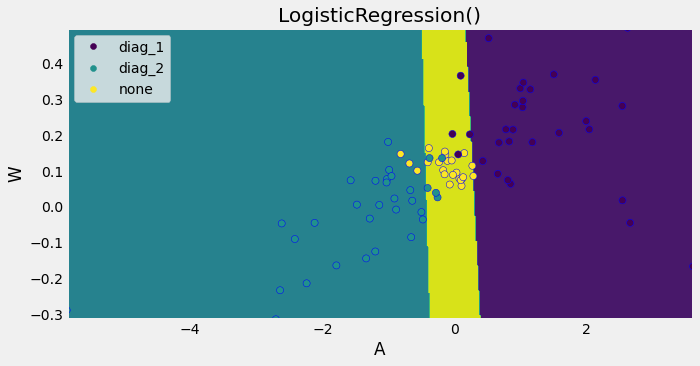

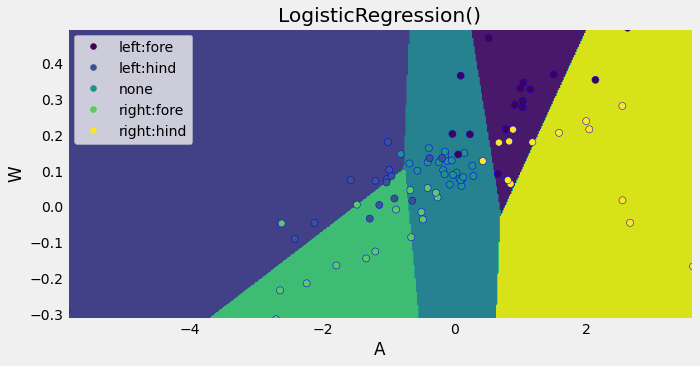

In [42]:
decision_boundary(X1, LogisticModel_3, c_colap,['diag_1', 'diag_2', 'none'], 'A', 'W')
decision_boundary(X1, LogisticModel_5, c, ["left:fore", "left:hind", "none", "right:fore", "right:hind"], 'A', 'W')

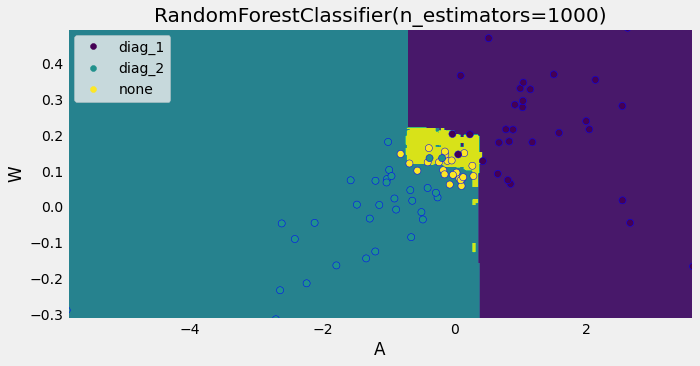

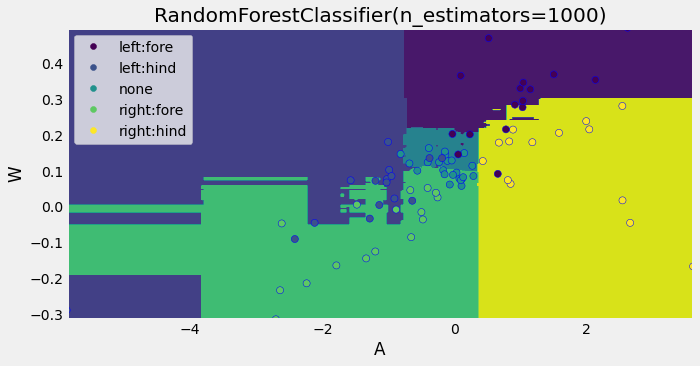

In [43]:
decision_boundary(X1, RandomForestModel_3, c_colap, ['diag_1', 'diag_2', 'none'], 'A', 'W')
decision_boundary(X1, RandomForestModel_5, c, ["left:fore", "left:hind", "none", "right:fore", "right:hind"], 'A', 'W')

In [44]:
# Mcnemar Colapsed PC3/PC€
# Forest vs Logistic
import random
from scipy.stats import beta
from scipy.stats import binom
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
X1 = df[['pc3', 'pc4']]
d1_n_11=[]
d1_n_10=[]
d1_n_01=[]
d1_n_00=[]

d2_n_11=[]
d2_n_10=[]
d2_n_01=[]
d2_n_00=[]

d3_n_11=[]
d3_n_10=[]
d3_n_01=[]
d3_n_00=[]

forest_1=0
log_1=0
base_1=0
i=0

names=random.choices(horses,k=2)
horse1=names[0]
horse2=names[1]
# Train test split: Leave two horses for test
train_split=((df['horse'].to_numpy()!=horse1) & (df['horse'].to_numpy()!=horse2))
test_split=((df['horse'].to_numpy()==horse1) | (df['horse'].to_numpy()==horse2))
X_train_pre=X1.to_numpy()[train_split]
X_test_pre=X1.to_numpy()[test_split]
y_train=c[train_split]
y_test=c[test_split]
y_train_collap = c_colap[train_split]
y_test_collap = c_colap[test_split]

# standardize data
X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()

# random forest 5
RandomForestModel_5 = RandomForestClassifier(n_estimators=1000)
RandomForestModel_5.fit(X_train, y_train)
print("RandomForestModel's accuracy 5:", sum(RandomForestModel_5.predict(X_test) == y_test)/len(y_test))
forest_1=RandomForestModel_5.predict(X_test) == y_test

# random forest 3
RandomForestModel_3 = RandomForestClassifier(n_estimators=1000)
RandomForestModel_3.fit(X_train, y_train_collap)
print("RandomForestModel's accuracy 3:", sum(RandomForestModel_3.predict(X_test) == y_test_collap)/len(y_test_collap))
forest3_1=RandomForestModel_3.predict(X_test) == y_test_collap

# Logistic 5
LogisticModel_5 = LogisticRegression()
LogisticModel_5.fit(X_train, y_train)
print("LogisticModel's accuracy 5:", sum(LogisticModel_5.predict(X_test) == y_test)/len(y_test))
log_1=LogisticModel_5.predict(X_test) == y_test

# Logistic 3
LogisticModel_3 = LogisticRegression()
LogisticModel_3.fit(X_train, y_train_collap)
print("LogisticModel's accuracy 3:", sum(LogisticModel_3.predict(X_test) == y_test_collap)/len(y_test_collap))
log3_1=LogisticModel_3.predict(X_test) == y_test_collap

# baseline 5
_, counts = np.unique(y_train, return_counts=True)
Baseline_y_pred = np.argmax(counts) + 1
Baseline_accuracy =  sum(y_test == Baseline_y_pred)/len(y_test)
print("Baseline's accuracy 5:", Baseline_accuracy)
base_1=y_test == Baseline_y_pred

# baseline 3
lame_collap, counts = np.unique(y_train_collap, return_counts=True)
Baseline_y_pred= np.argmax(counts) + 1
Baseline_accuracy =  sum(y_test_collap == Baseline_y_pred)/len(y_test_collap)
print("Baseline's accuracy 3:", Baseline_accuracy)
base3_1=y_test_collap == Baseline_y_pred

# Foresst 3 vs Forest 5
#Both are corect
d1_n_11.append(sum(forest_1*forest3_1))
# forest is correct log is wrong
d1_n_10.append(sum(forest3_1*(1-forest_1)))
# forest is wrong log is correct
d1_n_01.append(sum((1-forest3_1)*forest_1))
#Both wrong
d1_n_00.append(sum((1-forest3_1)*(1-forest_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d1_n_10[i]-d1_n_01[i])/n
if (n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Random forest 3 vs Random forest 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d1_n_10[i],d1_n_01[i]),(d1_n_10[i]+d1_n_01[i]),0.5)
print("p-value: ", pval)

# Log 3 vs log 5
#Both are corect
d2_n_11.append(sum(log_1*log3_1))
# forest is correct log is wrong
d2_n_10.append(sum(log3_1*(1-log_1)))
# forest is wrong log is correct
d2_n_01.append(sum((1-log3_1)*log_1))
#Both wrong
d2_n_00.append(sum((1-log3_1)*(1-log_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d2_n_10[i]-d2_n_01[i])/n
if (n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Log 3 vs log 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d2_n_10[i],d2_n_01[i]),(d2_n_10[i]+d2_n_01[i]),0.5)
print("p-value: ", pval)



# Base 3 vs base 5
#Both are corect
d3_n_11.append(sum(base3_1*base_1))
# forest is correct log is wrong
d3_n_10.append(sum(base_1*(1-base3_1)))
# forest is wrong log is correct
d3_n_01.append(sum((1-base_1)*base3_1))
#Both wrong
d3_n_00.append(sum((1-base_1)*(1-base3_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d3_n_10[i]-d3_n_01[i])/n
if (n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W: Baseline 3 vs Baseline 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d3_n_10[i],d3_n_01[i]),(d3_n_10[i]+d3_n_01[i]),0.5)
print("p-value: ", pval)
i+=1

RandomForestModel's accuracy 5: 0.6666666666666666
RandomForestModel's accuracy 3: 0.9444444444444444
LogisticModel's accuracy 5: 0.6111111111111112
LogisticModel's accuracy 3: 0.9444444444444444
Baseline's accuracy 5: 0.1111111111111111
Baseline's accuracy 3: 0.4444444444444444
A/W: Random forest 3 vs Random forest 5 
CI:  0.07085767032479606 : 0.4725140669765808
p-value:  0.0625
A/W: Log 3 vs log 5 
CI:  0.11368059634639494 : 0.536145638913623
p-value:  0.03125
A/W: Baseline 3 vs Baseline 5 
CI:  -0.6138927362336205 : -0.01864619250701749
p-value:  0.109375


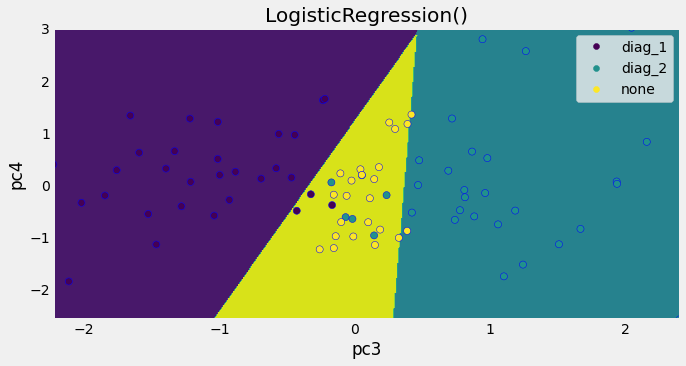

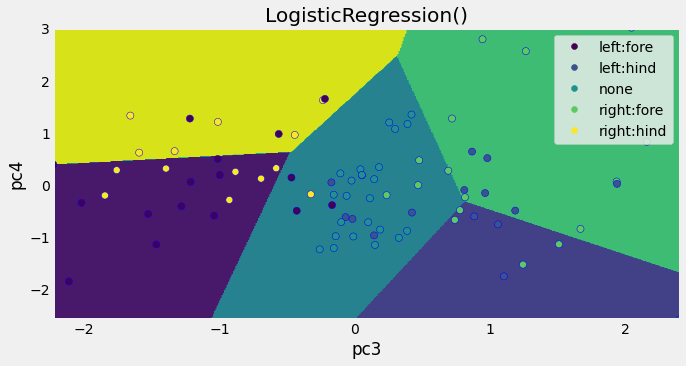

In [45]:
decision_boundary(X1, LogisticModel_3, c_colap, ['diag_1', 'diag_2', 'none'], 'pc3', 'pc4')
decision_boundary(X1, LogisticModel_5, c, ["left:fore", "left:hind", "none", "right:fore", "right:hind"], 'pc3', 'pc4')

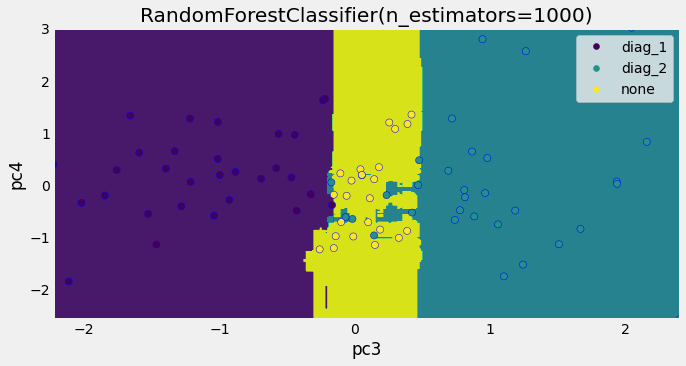

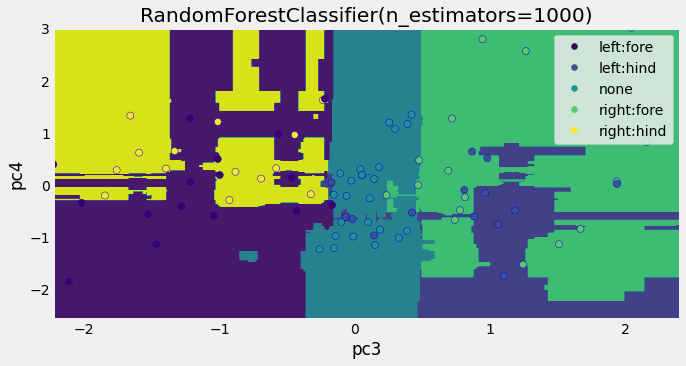

In [46]:
decision_boundary(X1, RandomForestModel_3, c_colap, ['diag_1', 'diag_2', 'none'], 'pc3', 'pc4')
decision_boundary(X1, RandomForestModel_5, c, ["left:fore", "left:hind", "none", "right:fore", "right:hind"], 'pc3', 'pc4')

In [59]:
# Mcnemar Collapsed PC3/PC4 og A/W
# Forest vs Logistic
from scipy.stats import beta
from scipy.stats import binom
horses=["B1","B2","B3","B4","B5","B6","B7","B9"]
X1 = df[['A','W','pc3', 'pc4']]
d1_n_11=[]
d1_n_10=[]
d1_n_01=[]
d1_n_00=[]

d2_n_11=[]
d2_n_10=[]
d2_n_01=[]
d2_n_00=[]

d3_n_11=[]
d3_n_10=[]
d3_n_01=[]
d3_n_00=[]

forest_1=0
log_1=0
base_1=0
i=0

names=random.choices(horses,k=2)
horse1=names[0]
horse2=names[1]
# Train test split: Leave two horses for test
train_split=((df['horse'].to_numpy()!=horse1) & (df['horse'].to_numpy()!=horse2))
test_split=((df['horse'].to_numpy()==horse1) | (df['horse'].to_numpy()==horse2))
X_train_pre=X1.to_numpy()[train_split]
X_test_pre=X1.to_numpy()[test_split]
y_train=c[train_split]
y_test=c[test_split]
y_train_collap = c_colap[train_split]
y_test_collap = c_colap[test_split]

# standardize data
X_train=(X_train_pre-X_train_pre.mean())/X_train_pre.std()
X_test=(X_test_pre-X_train_pre.mean())/X_train_pre.std()

# random forest 5
RandomForestModel_5 = RandomForestClassifier(n_estimators=1000)
RandomForestModel_5.fit(X_train, y_train)
print("RandomForestModel's accuracy 5:", sum(RandomForestModel_5.predict(X_test) == y_test)/len(y_test))
forest_1=RandomForestModel_5.predict(X_test) == y_test

# random forest 3
RandomForestModel_3 = RandomForestClassifier(n_estimators=1000)
RandomForestModel_3.fit(X_train, y_train_collap)
print("RandomForestModel's accuracy 3:", sum(RandomForestModel_3.predict(X_test) == y_test_collap)/len(y_test_collap))
forest3_1=RandomForestModel_3.predict(X_test) == y_test_collap

# Logistic 5
LogisticModel_5 = LogisticRegression()
LogisticModel_5.fit(X_train, y_train)
print("LogisticModel's accuracy 5:", sum(LogisticModel_5.predict(X_test) == y_test)/len(y_test))
log_1=LogisticModel_5.predict(X_test) == y_test

# Logistic 3
LogisticModel_3 = LogisticRegression()
LogisticModel_3.fit(X_train, y_train_collap)
print("LogisticModel's accuracy 3:", sum(LogisticModel_3.predict(X_test) == y_test_collap)/len(y_test_collap))
log3_1=LogisticModel_3.predict(X_test) == y_test_collap

# baseline 5
_, counts = np.unique(y_train, return_counts=True)
Baseline_y_pred = np.argmax(counts) + 1
Baseline_accuracy =  sum(y_test == Baseline_y_pred)/len(y_test)
print("Baseline's accuracy 5:", Baseline_accuracy)
base_1=y_test == Baseline_y_pred

# baseline 3
lame_collap, counts = np.unique(y_train_collap, return_counts=True)
Baseline_y_pred= np.argmax(counts) + 1
Baseline_accuracy =  sum(y_test_collap == Baseline_y_pred)/len(y_test_collap)
print("Baseline's accuracy 3:", Baseline_accuracy)
base3_1=y_test_collap == Baseline_y_pred

# Foresst 3 vs Forest 5
#Both are corect
d1_n_11.append(sum(forest_1*forest3_1))
# forest is correct log is wrong
d1_n_10.append(sum(forest3_1*(1-forest_1)))
# forest is wrong log is correct
d1_n_01.append(sum((1-forest3_1)*forest_1))
#Both wrong
d1_n_00.append(sum((1-forest3_1)*(1-forest_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d1_n_10[i]-d1_n_01[i])/n
if (n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d1_n_10[i]+d1_n_01[i])-(d1_n_10[i]-d1_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W/PC: Random forest 3 vs Random forest 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d1_n_10[i],d1_n_01[i]),(d1_n_10[i]+d1_n_01[i]),0.5)
print("p-value: ", pval)

# Log 3 vs log 5
#Both are corect
d2_n_11.append(sum(log_1*log3_1))
# forest is correct log is wrong
d2_n_10.append(sum(log3_1*(1-log_1)))
# forest is wrong log is correct
d2_n_01.append(sum((1-log3_1)*log_1))
#Both wrong
d2_n_00.append(sum((1-log3_1)*(1-log_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d2_n_10[i]-d2_n_01[i])/n
if (n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d2_n_10[i]+d2_n_01[i])-(d2_n_10[i]-d2_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W/PC: Log 3 vs log 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d2_n_10[i],d2_n_01[i]),(d2_n_10[i]+d2_n_01[i]),0.5)
print("p-value: ", pval)



# Base 3 vs base 5
#Both are corect
d3_n_11.append(sum(base3_1*base_1))
# forest is correct log is wrong
d3_n_10.append(sum(base_1*(1-base3_1)))
# forest is wrong log is correct
d3_n_01.append(sum((1-base_1)*base3_1))
#Both wrong
d3_n_00.append(sum((1-base_1)*(1-base3_1)))
# difference in accuracy
n=len(y_test)
Etheta=(d3_n_10[i]-d3_n_01[i])/n
if (n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)!=0:
    Q=n**2*(n+1)*(Etheta+1)*(1-Etheta)/(n*(d3_n_10[i]+d3_n_01[i])-(d3_n_10[i]-d3_n_01[i])**2)
    f=(Etheta+1)/2*(Q-1)
    g=(1-Etheta)/2*(Q-1)
    # 95 % confidence interval
    p_u=2*beta.ppf(0.975,f,g)-1
    p_l=2*beta.ppf(0.025,f,g)-1
    print("A/W/PC: Baseline 3 vs Baseline 5 ")
    print("CI: ",p_l,":",p_u) 
else:
    print("ZeroDivisionError")

# P- value
pval=2*binom.cdf(min(d3_n_10[i],d3_n_01[i]),(d3_n_10[i]+d3_n_01[i]),0.5)
print("p-value: ", pval)
i+=1

RandomForestModel's accuracy 5: 0.8888888888888888
RandomForestModel's accuracy 3: 1.0
LogisticModel's accuracy 5: 0.7222222222222222
LogisticModel's accuracy 3: 1.0
Baseline's accuracy 5: 0.1111111111111111
Baseline's accuracy 3: 0.4444444444444444
A/W/PC: Random forest 3 vs Random forest 5 
CI:  -0.031150693950727337 : 0.25114503527499066
p-value:  0.5
A/W/PC: Log 3 vs log 5 
CI:  0.07085767032479606 : 0.4725140669765808
p-value:  0.0625
A/W/PC: Baseline 3 vs Baseline 5 
CI:  -0.6138927362336205 : -0.01864619250701749
p-value:  0.109375
